<a href="https://colab.research.google.com/github/waltermayor/DigitalImageProcessing_colab/blob/master/TransformacionesGeome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
#import plotly.plotly as py
#import plotly.tools as tls

path='/content/drive/My Drive/colab/images/'
os.chdir(path)
!pwd

# graficar imagenes estaticas en el notebook

#statico
%matplotlib inline  

#dinamico
#%matplotlib notebook 



/content/drive/My Drive/colab/images


# **Escalado**

Antes de escalado:  1519 2000
despues de escalado:  6076 8000


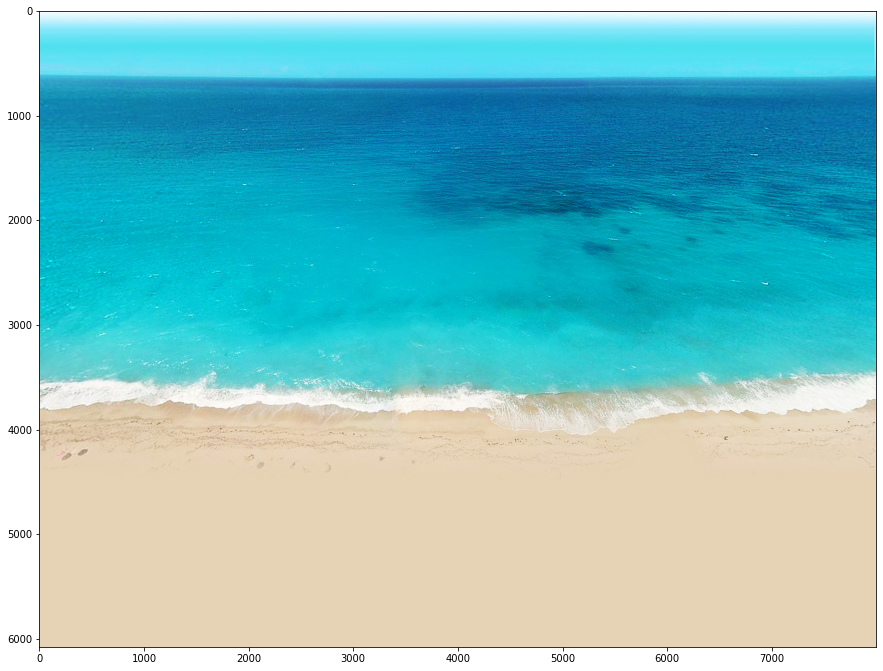

In [0]:


img = cv2.imread('playa.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

#OR

height, width = img.shape[:2]
print("Antes de escalado: ",height, width)
res = cv2.resize(img,(4*width, 4*height), interpolation = cv2.INTER_CUBIC)
height, width = res.shape[:2]
print("despues de escalado: ",height, width)
fig1=plt.figure(figsize=(15,15))
plt.imshow(res)
plt.show()



# **Translación**

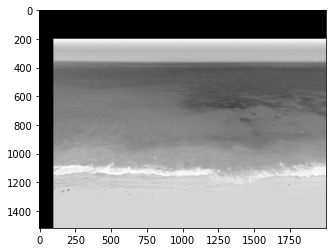

In [0]:
img = cv2.imread('playa.jpg',0)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,200]])
dst = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst, cmap="gray")


# **Rotación**

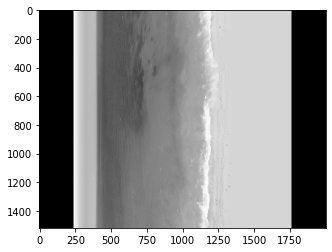

In [0]:
img = cv2.imread('playa.jpg',0)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) # (centro, angulo, escala)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst, cmap="gray")

# **Flip (dar la vuelta)**

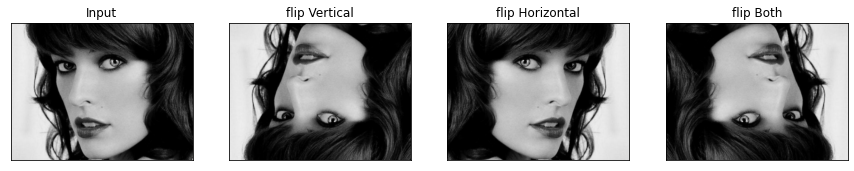

In [0]:
img = cv2.imread("resid.png",cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

flipVertical = cv2.flip(img, 0)
flipHorizontal = cv2.flip(img, 1)
flipBoth = cv2.flip(img, -1)

plt.figure(figsize=(15,15))
plt.subplot(141),plt.imshow(img),plt.title('Input'),plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(flipVertical),plt.title('flip Vertical'),plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(flipHorizontal),plt.title('flip Horizontal'),plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(flipBoth),plt.title('flip Both'),plt.xticks([]), plt.yticks([])
plt.show()

# **Transformación Afin**

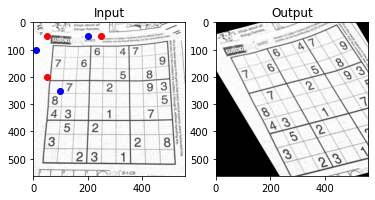

In [0]:
img = cv2.imread('sudoku.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[250,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

xE=[50,250,50]
yE=[50,50,200]
xS=[10,200,100]
yS=[100,50,250]

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.scatter(xE,yE,color='r')
plt.scatter(xS,yS,color='b')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()


# **Transformación de Perspectiva**

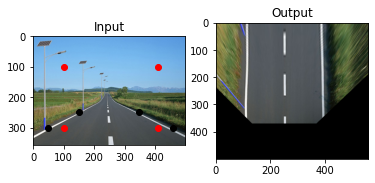

In [55]:
img = cv2.imread('calle.jpg',cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
rows,cols,ch = img.shape

pts1 = np.float32([[150,250],[347,250],[50,300],[460,300]])
pts2 = np.float32([[100,100],[410,100],[100,300],[410,300]])
xE = [150,347,50,460]
yE = [250,250,300,300]
xS = [100, 410,100,410]
yS = [100,100,300,300]

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(rows+200,cols))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.scatter(xE,yE,color='k')
plt.scatter(xS,yS,color='r')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()


# **Translación y Rotación**

1519 2000


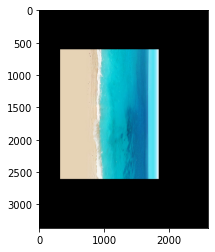

In [0]:
#@title Transformation Parameters { run: "auto" }
img_BGR=cv2.imread('playa.jpg',cv2.IMREAD_COLOR)
img_RGB=cv2.cvtColor(img_BGR,cv2.COLOR_BGR2RGB)
theta_degrees = 90 #@param {type:"slider", min:0, max:360, step:10}
shift_x = 1844 #@param {type:"slider", min:-250, max:2000, step:2}
shift_y = 606 #@param {type:"slider", min:-100, max:2500, step:2}
# We can also play around with rotations by defining our M matrix, 
"""
| cos(theta) -sin(theta) tx | 
| sin(theta)  cos(theta) ty |
"""
rows, cols, _ = img_RGB.shape
print(rows, cols)
radians = theta_degrees * np.pi / 180
M = [
        [np.cos(radians), -np.sin(radians), shift_x], 
        [np.sin(radians),  np.cos(radians), shift_y]
    ]
M = np.array(M)
rows += int(shift_x)
cols += int(shift_y)
res = cv2.warpAffine(img_RGB, M, (cols,rows))
plt.imshow(res)
plt.show()